cv2.imshow() not supported. Saving and displaying with Matplotlib.


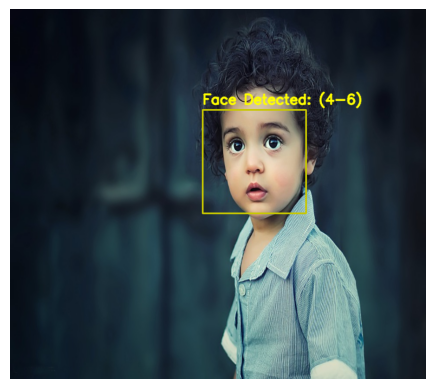

In [3]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt  # For Jupyter Notebook display

# Load image
img = cv2.imread('kid1.jpg')

if img is None:
    print("Error: Image not found. Check the file path.")
    exit()

img = cv2.resize(img, (720, 640))
frame = img.copy()

# ------------ Load Age Detection Model --------#
age_weights = "age_net.caffemodel"
age_config = "age_deploy.prototxt"

try:
    age_Net = cv2.dnn.readNet(age_config, age_weights)
except:
    print("Error: Could not load age detection model. Check file paths.")
    exit()

# Age categories
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
           '(25-32)', '(38-43)', '(48-53)', '(60-100)']
model_mean = (78.4263377603, 87.7689143744, 114.895847746)

# Storing image dimensions
fH, fW = img.shape[:2]

Boxes = []  # To store detected face coordinates
mssg = 'Face Detected'

# ------------- Face Detection using dlib --------#
face_detector = dlib.get_frontal_face_detector()
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_detector(img_gray)

if not faces:
    mssg = 'No face detected'
    cv2.putText(img, f'{mssg}', (40, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (200, 200, 200), 2)

    # Display the image
    cv2.imwrite("output.jpg", img)  # Save if imshow fails
    print("No face detected. Image saved as 'output.jpg'.")
else:
    # --------- Draw Bounding Box ---------#
    for face in faces:
        x, y, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        box = [x, y, x2, y2]
        Boxes.append(box)
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 200, 200), 2)

    for box in Boxes:
        face = frame[box[1]:box[3], box[0]:box[2]]

        # ----- Preprocess Image for Age Detection --------#
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), model_mean, swapRB=False)

        # ------- Predict Age ---------#
        age_Net.setInput(blob)
        age_preds = age_Net.forward()
        age = ageList[age_preds[0].argmax()]

        # Add text on image
        cv2.putText(frame, f'{mssg}: {age}', (box[0], box[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)

    # --------- Display Output ---------#
    try:
        cv2.imshow('Result', frame)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except:
        # If cv2.imshow() fails, use Matplotlib
        print("cv2.imshow() not supported. Saving and displaying with Matplotlib.")
        cv2.imwrite("output.jpg", frame)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.show()
